# Analysis of prostate trial data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import sys
import matplotlib.pyplot as plt

sys.path.append("./local/")
import initialize as initialize

dataDfName = "./data/MCC 19367_C1.xlsx"

patientIdDic = {2:'102', 3:'103', 4:'104', 5:'105',# 
               6:'106',7:'107',8:'108',9:'109',10:'110',
               11:'111',12:'112',13:'113',14:'114',15:'115',
               16:'116',17:'117'} 

/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/MyPapers/InProgress/PCa early progressors/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/MyPapers/InProgress/PCa early progressors/early_progressors_code_FINAL/./local/initialize.py:99: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


[None]

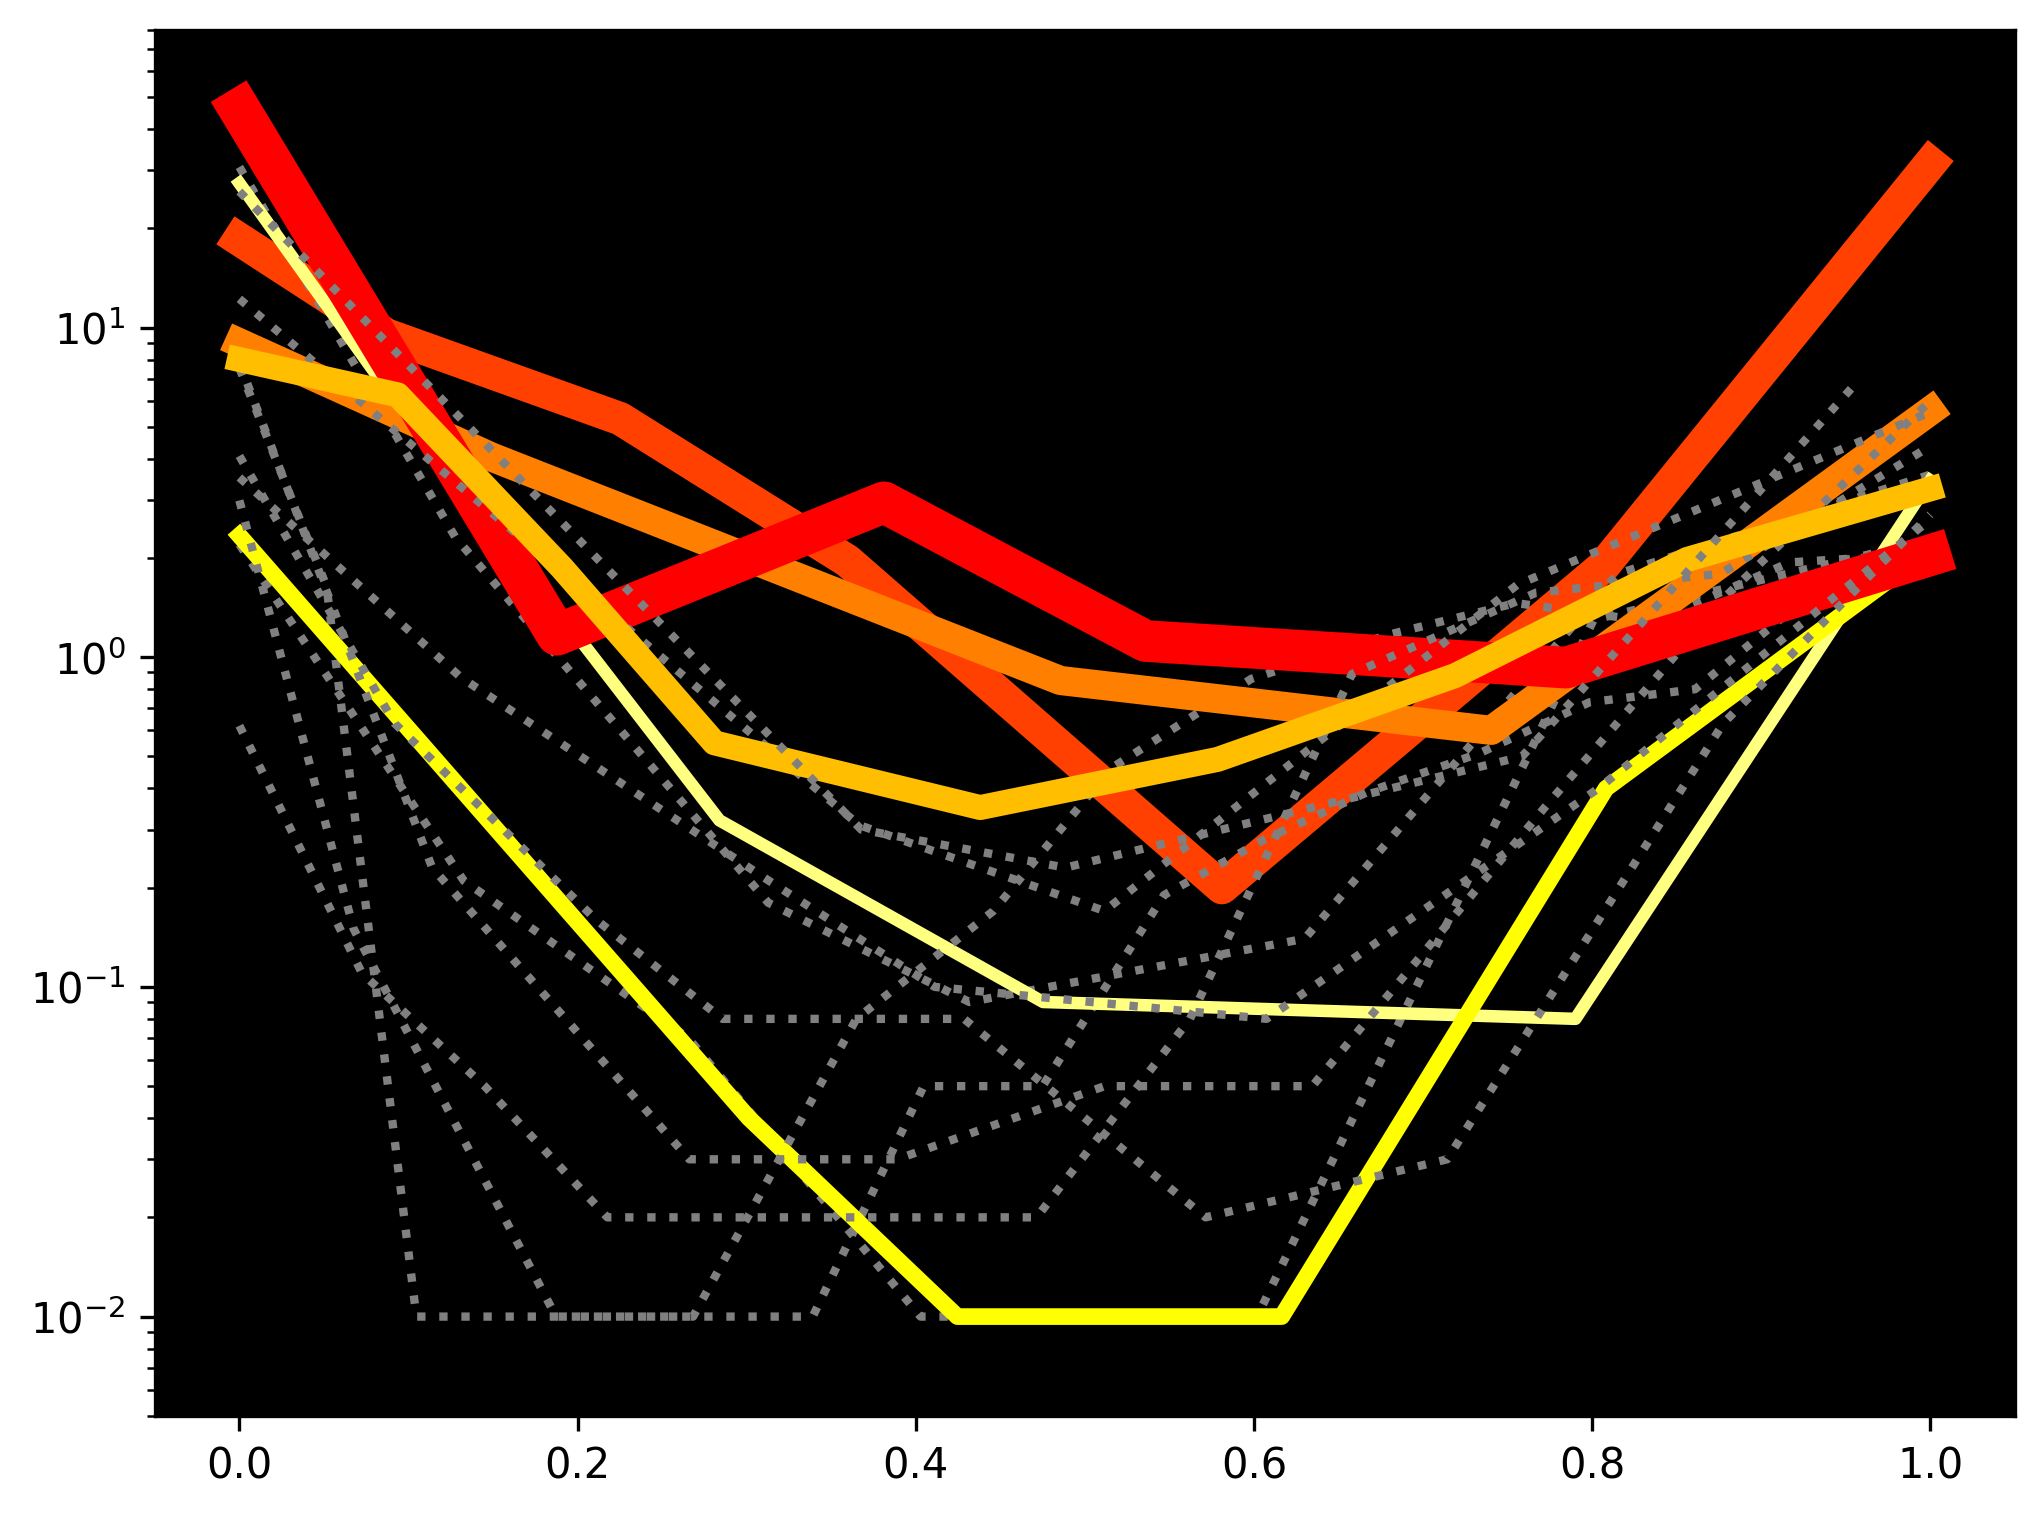

In [3]:
plotType=0#0=PSA,1=Test,2=PSA/T 

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_facecolor('black')
patientOrder=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

for pi,pat in enumerate(patientOrder):
    patId = patientIdDic[pat]
    dataD = initialize.loadData(dataDfName,patId)
    inds1=np.where(~np.isnan(dataD['PSA']))[0]
    inds2=np.where(~np.isnan(dataD['Testosterone']))[0] 
    inds=inds2 & inds2 
    size=40
    ls='-'
    if(pi==9):
        col=[1,0,0]
        lw=10
    elif(pi==0):
        col=[1,0.25,0]
        lw=8
    elif(pi==7):
        col=[1,.5,0]
        lw=7
    elif(pi==14):
        col=[1,.75,0]
        lw=6
    elif(pi==5):
        col=[1,1,0]
        lw=4
    elif(pi==4):
        col=[1,1,0.5]
        lw=3
    else:
        col=[.5,.5,.5]
        lw=2
        ls=':'
    if(plotType==0):
        plt.plot(dataD['Days'].iloc[inds1]/dataD['Days'].iloc[-1],dataD['PSA'].iloc[inds1],c=col,linewidth=lw,linestyle=ls)
        ax.set_ylim([.005,80])
    elif(plotType==1): 
         
        plt.plot(dataD['Days'].iloc[inds2]/dataD['Days'].iloc[-1],dataD['Testosterone'].iloc[inds2],c=col,linewidth=lw,linestyle=ls)
        ax.set_ylim([1,2000])
    else:    
        plt.plot(dataD['Days'].iloc[inds]/dataD['Days'].iloc[-1],dataD['PSA'].iloc[inds]/dataD['Testosterone'].iloc[inds],c=col,linewidth=lw,linestyle=ls)
ax.set(yscale='log')